# Task 2 - Donald Trump's Tweets

**congratulations!** You have been hired by Donald John Trump as a personal analyst. He has a few missions for you. However, he doesn't like to share a lot of information about himself... So you'll have to answer all his questions using his Tweets on Twitter.


## Instructions

#### 1 - Loading the data
First, load the data you've received:
- Remove any blank rows (where all the values are missing).
- Treat every missing numeric value as zero and every missing textual value as blank string.
- Set the type of every column to the best fitting (float, date, boolean, etc.)

#### 2 - Which platform?
Generate a bar chart showing in which platform Trump is twitting (Android, iPhone, etc). Eech bar should represent the total amount of tweets written from its platform. Show only the 10 platforms he uses most.

#### 3 - Best time to tweet
Trump wants his tweets to be viral. He is asking you to check at what time of the day his tweets get on average the most retweets (shares) and the most favorite (likes).

The time spans to compare is every round hour (i.e. 00:00-01:00, 01:00-02:00, etc). Show this data in a bar chart. Each bar should represent an hour of the day, and show the average amount of likes/shares of tweets created in that hour.

Do it twice: once for the time **before** Trump got elected, and once **after** he got elected. The election date was November 8th 2016. The election date itself should be included in the `before` data (since it was known that Trump won only by the end of this day).

#### 4 - Tweets per hour
Generate another bar chart showing when does Trump tweet, to understand if he is doing it well or not.

The chart should show the total amount of tweets created in every hour of the day.

Can you assume how many hours a day does Trump sleep? Write your assumption, and how you reached that conclusion.

Do it twice: once for the time **before** Trump got elected, and once **after** he got elected.

#### 5 - Best tweet length
Trump also wants to know whether he should do long tweets or short ones.

Create a horizontal bar plot of the average number of retweets and favorite based on the tweets length (Do it twice: once for the time **before** Trump got elected, and once **after** he got elected):
  * **Very short**: len < 70
  * **Short**: 70 <= len < 110
  * **Medium**: 110 <= len < 130
  * **Long**: 130 <= len < 140
  * **Very long**: 140 <= len

You may create a single plot showing both the likes and shares (in different colors), or a plot for likes and another one for the shares.

The bars should be ordered from `Very short` to `Very long`.

#### 6 - Tweet length distribution
Generate a pie chart showing how Trump's tweets really are distributed between these categories (`Very short` to `Very long`). The pie chart should show represent the total amount of tweets in each length category.

Do it twice: once for the time **before** Trump got elected, and once **after** he got elected.

#### 7 - Android vs iPhone
Generate a plot showing Trump's usage of Android and of iPhone over time. It should be a plot with two lines one over the other, when one shows the iPhone usage and the other shows the Android usage.

The lines can represent the total amount of tweets created from iPhone/Android per unit of time (can be day/week/month).

#### 8 - Market influence
Trump has a theory that people tend to retweet him much more when the stock market goes up. Check if that is true and show it on a visual. 

For that you have another file with the stock market performance (the value of the S&P 500 index). The stock market goes up if the `Close` price is higher than the `Open` price.

Show the average retweets Trump got on days that the market went up, versus the average on days that the market went down. Choose a plot type that you see fit for representing this data.

## Notes
1. Use a seperate cell (or more) for each section.
2. Use headings for the different sections - make it clear which code belongs to which section of the task.
3. You should design the plots to be clear and readable - you can use titles, labels, grid, styles, and any other feature that will help you produce beautiful and useful plots.
4. Use meaningful names of variables and functions.
5. Document your code.
6. Delete any irrelevant code before submitting - drafts, tests etc should not be submitted.
7. Do **not** use absolute paths, always use relative paths, so your code can be tested by the staff.
8. Overall, the submition should look clear, clean and tidy.
9. **You can use external modules if you wish**
10. Besides code correctness, your grade will be based on all the above

## Good luck!
![alt text](https://cdn.pixabay.com/photo/2017/01/31/19/15/cartoon-2026571_1280.png "Donald Trump")


In [105]:
#needed Imports
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [111]:
DATE_ELECTED = '2016-11-08'
TWEETS_PATH = './trump_tweets.csv'

In [38]:
TWEETS_DF = pd.read_csv(r'./trump_tweets.csv')
TWEETS_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34591 entries, 0 to 34590
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0     source            34591 non-null  object 
 1     text              34590 non-null  object 
 2     created_at        34587 non-null  object 
 3     retweet_count     34587 non-null  float64
 4     favorite_count    34587 non-null  float64
 5     is_retweet        34529 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.6+ MB


In [277]:
# First treatment of data, creating a new coulmn for represnting the len category of the tweet.
TWEETS_DF.isna().sum()
TWEETS_DF['len'] = TWEETS_DF['  text  '].str.len()
#first create the bins and the labels 
bins = [0,70,110,130,140,250] # Bins length as required.
labels = ["Very short","Short","Medium","Long","Very Long"] # Bins name
TWEETS_DF['len_bin'] = pd.cut(x=TWEETS_DF.len, bins=bins, labels=labels) # Create the bins
TWEETS_DF.head(20)

source                                               text    \
0     Twitter for iPhone  RT @realDonaldTrump: WE WILL NEVER FORGET! htt...   
1     Twitter for iPhone  Why should Radical Left Democrats in Congress ...   
2     Twitter for iPhone  ....extraordinary growth economic success and ...   
3     Twitter for iPhone  I agree with Kim Jong Un of North Korea that o...   
4     Twitter for iPhone  In New York State Democrats blocked a Bill exp...   
5     Twitter for iPhone  Another Fake Story on @NBCNews that I offered ...   
6     Twitter for iPhone  A Fake Story by Politico. Made up sources. Tha...   
7     Twitter for iPhone  RT @politicalelle: How is this woman walking t...   
8     Twitter for iPhone  RT @dbongino: With the exception of FISA warra...   
9     Twitter for iPhone  Finally great news at the Border! https://t.co...   
10    Twitter for iPhone  Finally great news at the Border! https://t.co...   
11    Twitter for iPhone  Thank you Jeh so well stated! https://t.co/4Qm...   
12    Twitter for iPhone  If the Radical Left Democrats all of a sudden ...   
13    Twitter for iPhone  WSJ's Strassel: Barr 'Right' to Say 'Spying' O...   
14    Twitter for iPhone  RT @trish_regan: .@CLewandowski_ says he is PO...   
15  Twitter Media Studio      WE WILL NEVER FORGET! https://t.co/VxrGFRFeJM   
16    Twitter for iPhone  Due to the fact that Democrats are unwilling t...   
17    Twitter for iPhone  ....The Radical Left always seems to have an O...   
18    Twitter for iPhone  Even the Democrats now say that our Southern B...   
19    Twitter for iPhone  “Democrats don’t like the results of the Muell...   

          created_at      retweet_count      favorite_count     is_retweet    \
0  2019-04-13 16:01:11            69709.0                 0.0           True   
1  2019-04-13 12:21:05            27460.0            103713.0          False   
2  2019-04-13 12:04:18            15035.0             70792.0          False   
3  2019-04-13 11:54:45            17405.0             79877.0          False   
4  2019-04-13 03:51:00            31263.0            105245.0          False   
5  2019-04-13 03:33:05            27466.0            101056.0          False   
6  2019-04-13 02:59:36            15642.0             56099.0          False   
7  2019-04-13 02:51:24            20704.0                 0.0           True   
8  2019-04-13 02:45:25            11428.0                 0.0           True   
9  2019-04-13 02:42:07             8234.0             31674.0          False   
10 2019-04-13 02:38:54                3.0                 1.0          False   
11 2019-04-13 02:35:03            13553.0             51519.0          False   
12 2019-04-13 02:30:47            32231.0            112525.0          False   
13 2019-04-12 23:26:32            14790.0             50862.0          False   
14 2019-04-12 22:38:45            12954.0                 0.0           True   
15 2019-04-12 21:35:31            83717.0            230040.0          False   
16 2019-04-12 16:38:02            39587.0            164119.0          False   
17 2019-04-12 16:38:02            25610.0            115233.0          False   
18 2019-04-12 14:19:36            18070.0             76713.0          False   
19 2019-04-12 13:46:27            17435.0             69526.0          False   

    len     len_bin  
0    66  Very short  
1   265         NaN  
2   272         NaN  
3   278         NaN  
4   187   Very Long  
5   267         NaN  
6    90       Short  
7    96       Short  
8   141   Very Long  
9    57  Very short  
10   57  Very short  
11   53  Very short  
12  263         NaN  
13  126      Medium  
14  140        Long  
15   45  Very short  
16  204   Very Long  
17  113      Medium  
18  165   Very Long  
19  212   Very Long

In [21]:
NULL_DF = TWEETS_DF[TWEETS_DF.isna().any(axis=1)] # Search for nulls
NULL_DF

source    \
4619      Twitter for iPhone   
4620      Twitter for iPhone   
4621      Twitter for iPhone   
4622      Twitter for iPhone   
4623      Twitter for iPhone   
...                      ...   
4676      Twitter for iPhone   
34127              TweetDeck   
34250              TweetDeck   
34273              TweetDeck   
34274  http://bit.ly/pwgGsQ    

                                                  text           created_at    \
4619   Thanks to all of the Republican and Democratic...  2018-01-09 22:51:50   
4620   It was my great honor to sign H.R. 267 the “Ma...  2018-01-09 20:17:17   
4621   On behalf of the American people THANK YOU to ...  2018-01-09 17:11:23   
4622   We are fighting for our farmers for our countr...  2018-01-08 23:19:47   
4623   In every decision we make we are honoring Amer...  2018-01-08 22:59:37   
...                                                  ...                  ...   
4676   The United States has foolishly given Pakistan...  2018-01-01 12:12:00   
34127  My interview which recently aired on CNBC's Sq...                  NaN   
34250  http://goo.gl/AMNEE Countdown to @AmericaNowRa...                  NaN   
34273                              http://bit.ly/pwgGsQ                   NaN   
34274                                                NaN                  NaN   

         retweet_count      favorite_count     is_retweet    
4619             11718.0             58068.0            NaN  
4620             17249.0             73554.0            NaN  
4621             26793.0            112613.0            NaN  
4622             22044.0            104968.0            NaN  
4623             17769.0             81027.0            NaN  
...                  ...                 ...            ...  
4676            101056.0            304676.0            NaN  
34127                NaN                 NaN            NaN  
34250                NaN                 NaN            NaN  
34273                NaN                 NaN            NaN  
34274                NaN                 NaN            NaN  

[62 rows x 6 columns]

In [55]:
# Fill null values with given default values
TWEETS_DF['  favorite_count  '].fillna(value = 0 , inplace = True)
TWEETS_DF['  retweet_count  '].fillna(value = 0 , inplace = True)
TWEETS_DF['  created_at  '].fillna(value = "" , inplace = True)
TWEETS_DF['  is_retweet  '].fillna(value = "" , inplace = True)
TWEETS_DF['  text  '].fillna(value = "" , inplace = True)

In [121]:
TWEETS_DF['  created_at  '] = TWEETS_DF['  created_at  '].astype('datetime64[ns]')

In [324]:
# Get the top 2 Soruces
x = TWEETS_DF['  source  '].value_counts().index[0:10]
y =  TWEETS_DF['  source  '].value_counts()[0:10]

Twitter for Android    12898
Twitter for iPhone      8881
Name:   source  , dtype: int64

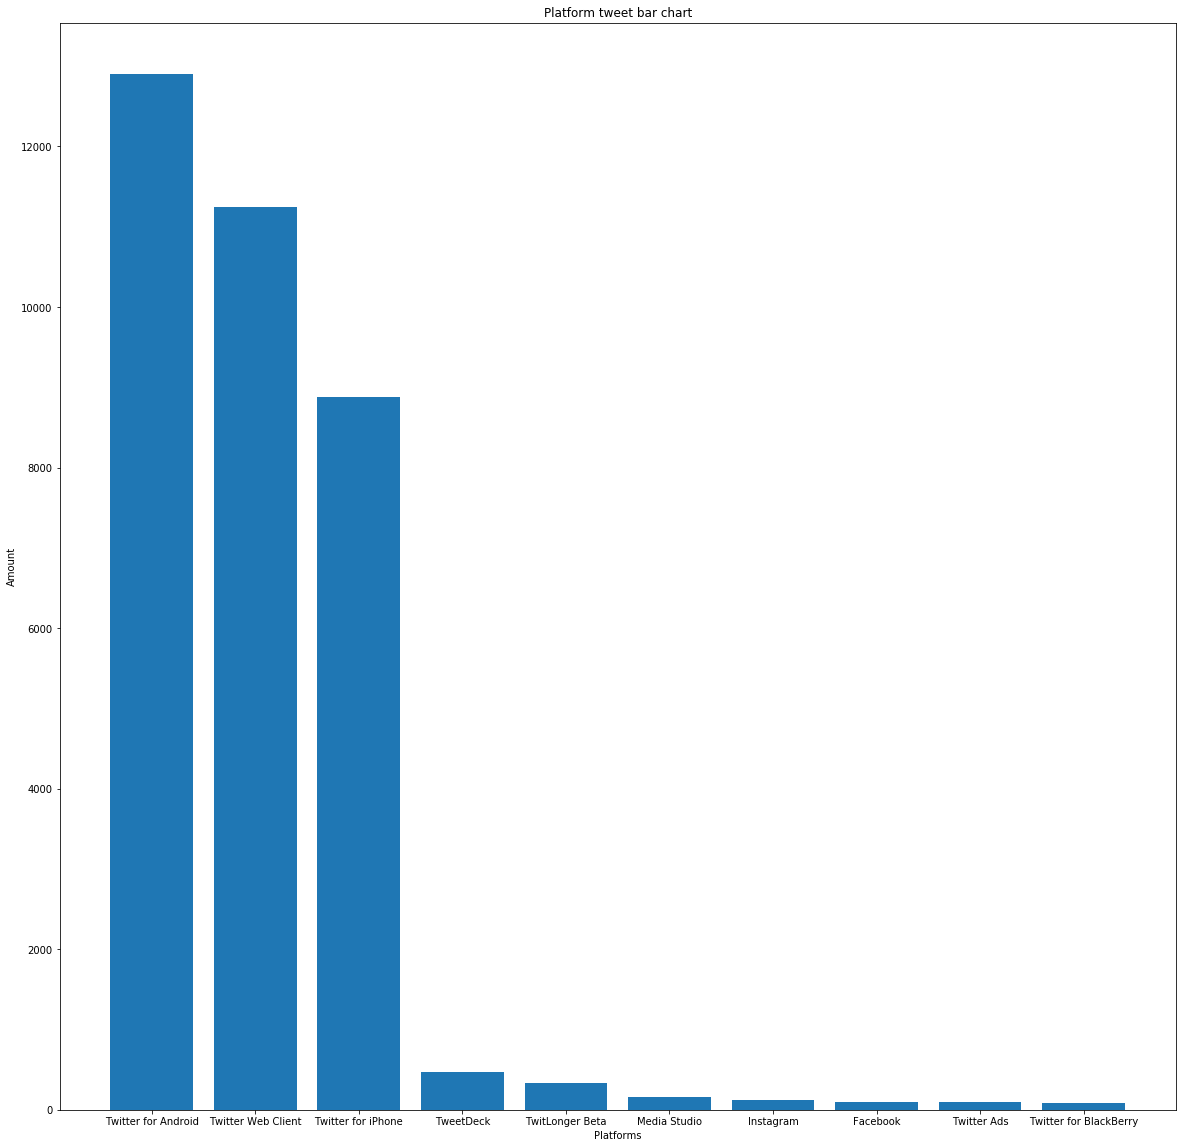

In [103]:
# Create a histograma
fig = plt.figure(figsize = (20, 20))
plt.bar(x, y)
 
plt.xlabel("Platforms")
plt.ylabel("Amount")
plt.title("Platform tweet bar chart")
plt.show()

In [278]:
# Create 2 new Dataframes one to represent situation before elections and one to represent situation after them.
Before = TWEETS_DF.loc[(TWEETS_DF['  created_at  '] <= datetime.strptime('11/08/16 23:59:59', '%m/%d/%y %H:%M:%S') )]
After = TWEETS_DF.loc[(TWEETS_DF['  created_at  '] > datetime.strptime('11/08/16 23:59:59', '%m/%d/%y %H:%M:%S') )]

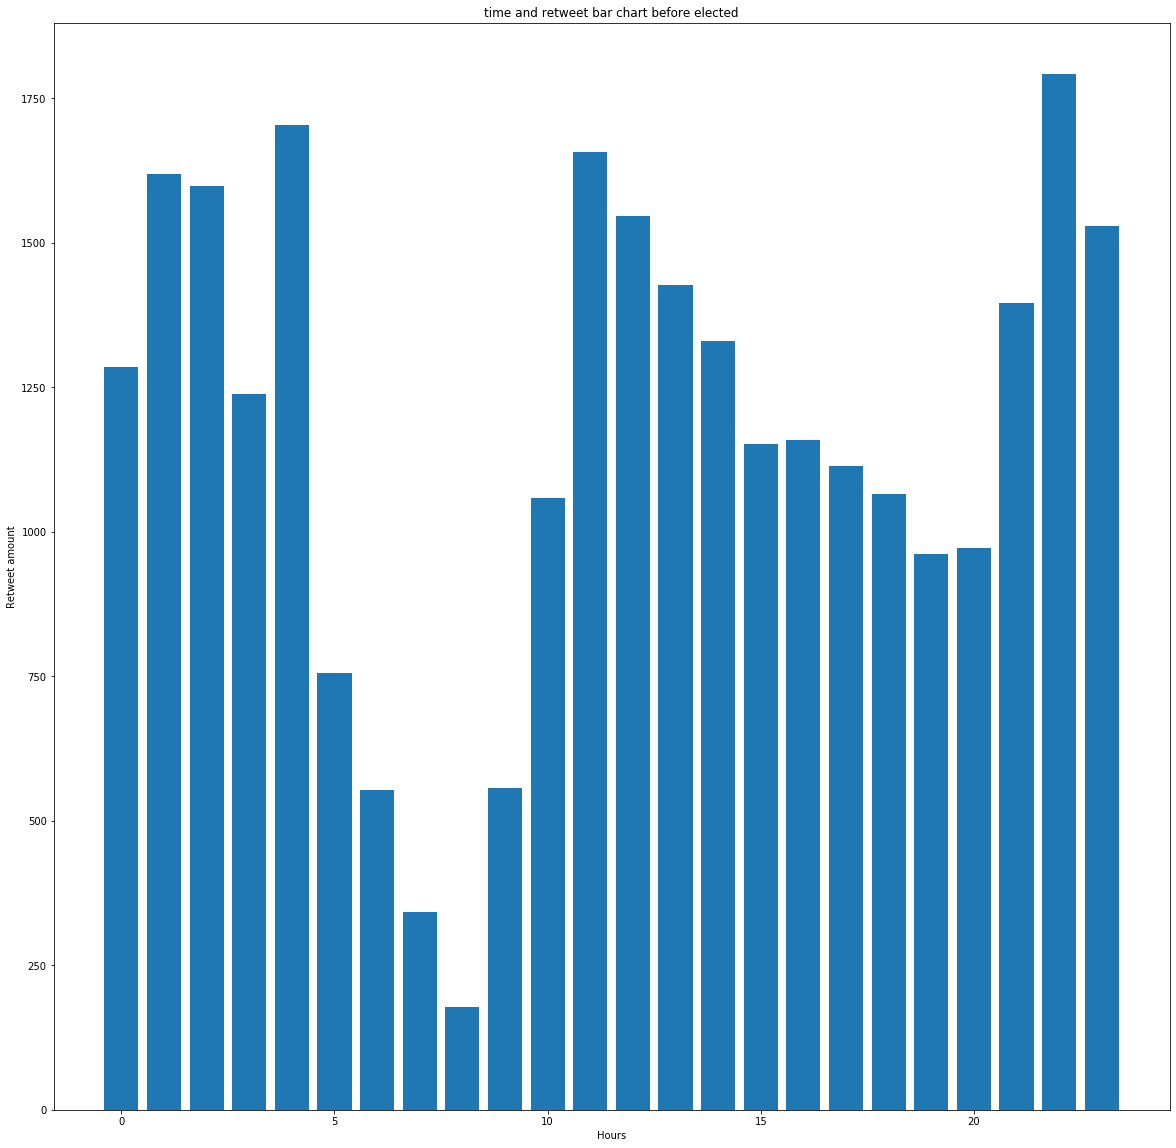

In [238]:
# Create a histograma to compare tweets before and after elections
Before_elected  = Before.groupby(Before['  created_at  '].dt.hour).mean()
x_Before = Before_elected.index
y_Before = Before_elected['  retweet_count  ']
fig = plt.figure(figsize = (20, 20))
plt.bar(x_Before, y_Before)
 
plt.xlabel("Hours")
plt.ylabel("Retweet amount")
plt.title("time and retweet bar chart before elected")
plt.show()

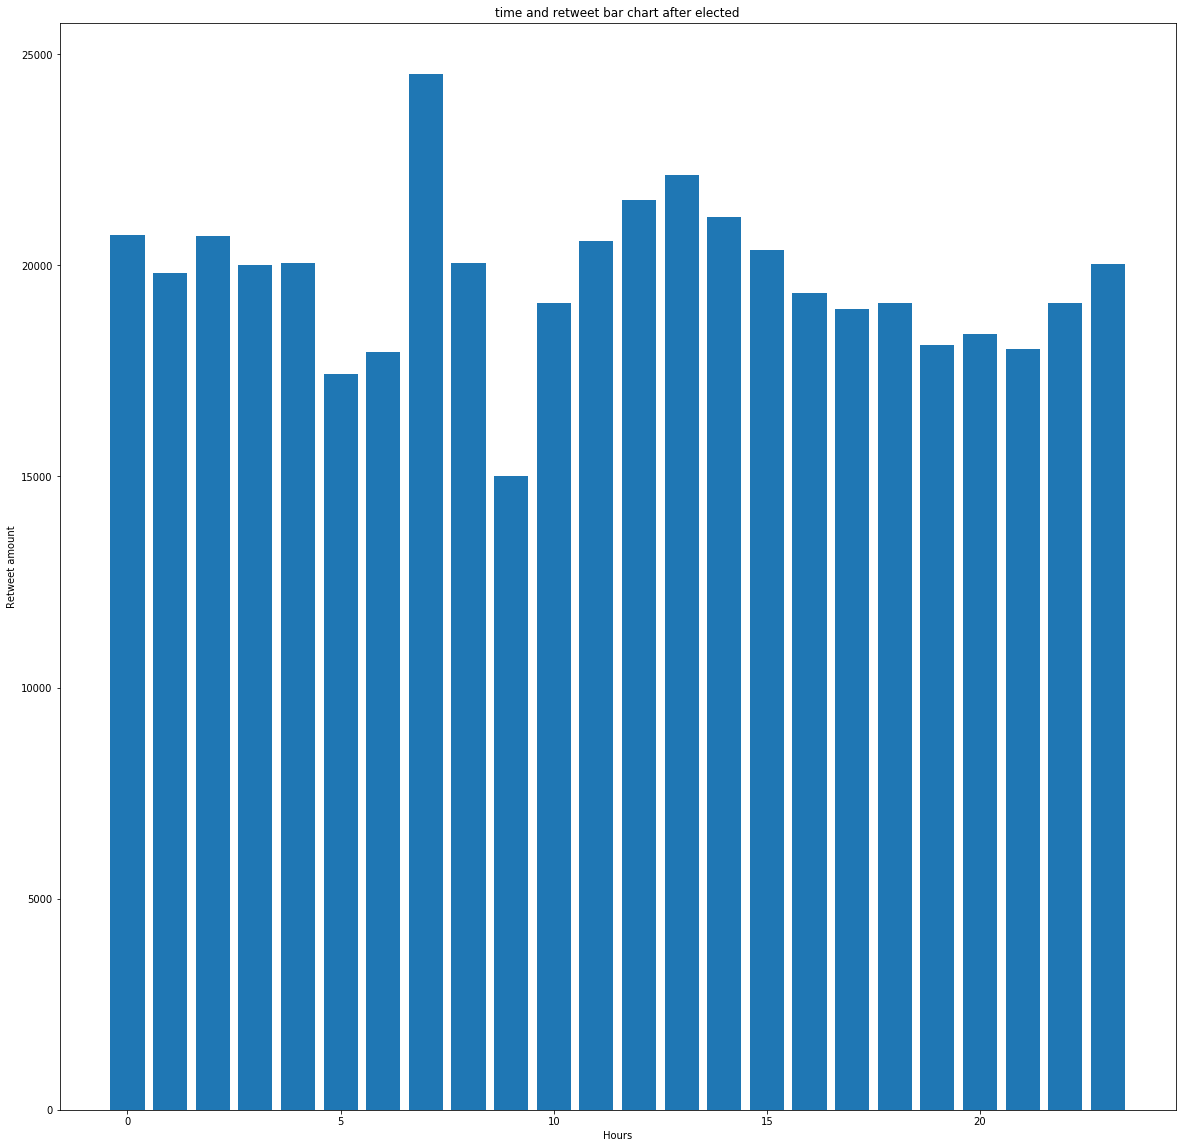

In [239]:
#Create a histogram of trump tweets amount based on the time of the day after and before the elections
After_elected  = After.groupby(After['  created_at  '].dt.hour).mean()
x_After = After_elected.index
y_After = After_elected['  retweet_count  ']
fig = plt.figure(figsize = (20, 20))
plt.bar(x_After, y_After)
 
plt.xlabel("Hours")
plt.ylabel("Retweet amount")
plt.title("time and retweet bar chart after elected")
plt.show()

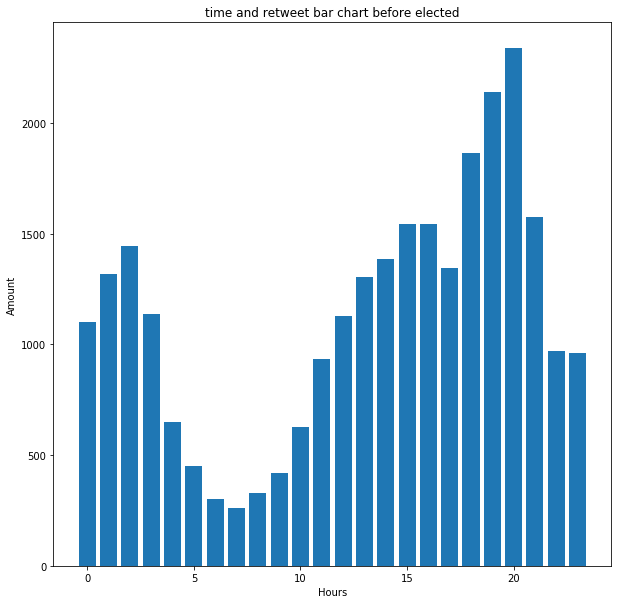

In [249]:
Before_elected2  = Before.groupby(Before['  created_at  '].dt.hour).count()
x_Before2 = Before_elected2.index.tolist()
y_Before2 = Before_elected2['  source  ']
fig = plt.figure(figsize = (10, 10))
plt.bar(x_Before2, y_Before2)
 
plt.xlabel("Hours")
plt.ylabel("Amount")
plt.title("time and retweet bar chart before elected")
plt.show()

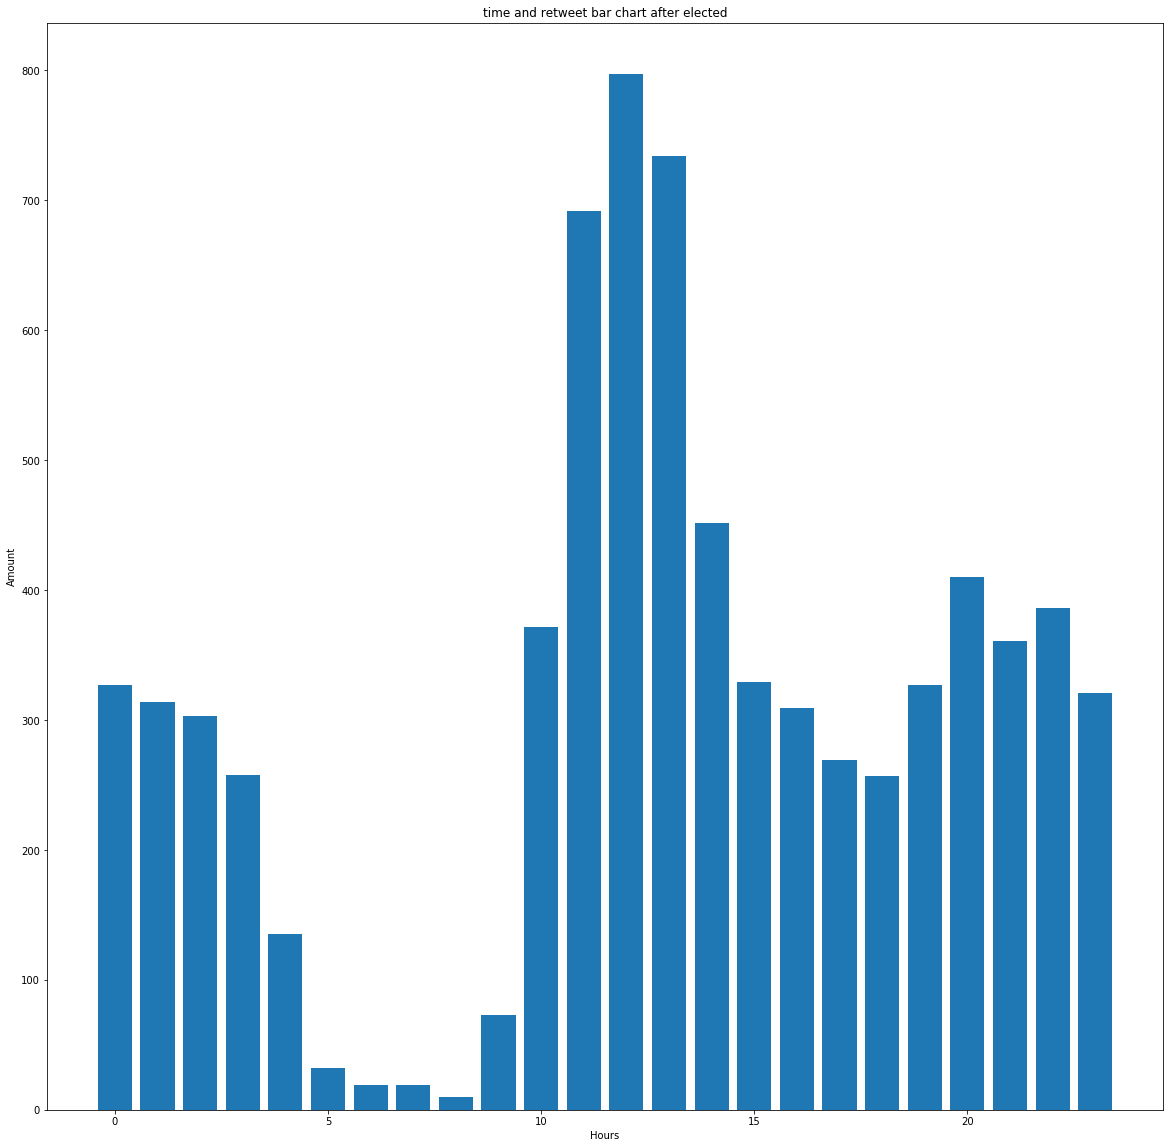

In [253]:
After_elected2  = After.groupby(After['  created_at  '].dt.hour).count()
x_After2 = After_elected2.index.tolist()
y_After2 = After_elected2['  source  ']
fig = plt.figure(figsize = (20, 20))
plt.bar(x_After2, y_After2)
 
plt.xlabel("Hours")
plt.ylabel("Amount")
plt.title("time and retweet bar chart after elected")
plt.show()

In [ ]:
#לדעתי טראמפ ישן בין השעות 3 בבוקר ל9 בבוקר בגלל שב3 מתחילה ירידה בכמות וב9 מתחילה עלייה

In [292]:
Before_elected_len  = Before.groupby(Before['len_bin']).mean()
After_elected_len = After.groupby(After['len_bin']).mean()

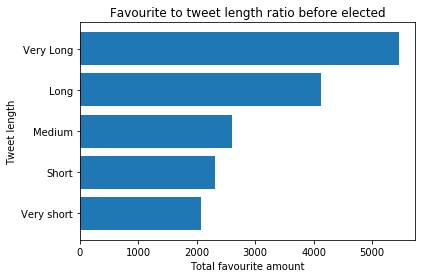

In [293]:
y_len = Before_elected_len.index
x_len = Before_elected_len['  favorite_count  ']

plt.barh(y_len,x_len)
plt.title('Favourite to tweet length ratio before elected')
plt.ylabel('Tweet length')
plt.xlabel('Total favourite amount')
plt.show()


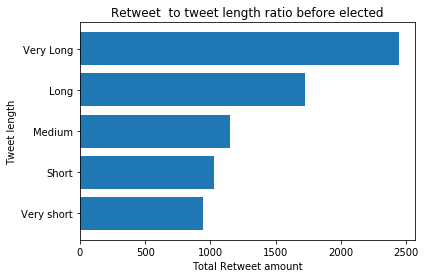

In [294]:
y_len_retweet = Before_elected_len.index
x_len_retweet = Before_elected_len['  retweet_count  ']

plt.barh(y_len_retweet,x_len_retweet)
plt.title('Retweet  to tweet length ratio before elected')
plt.ylabel('Tweet length')
plt.xlabel('Total Retweet amount')
plt.show()

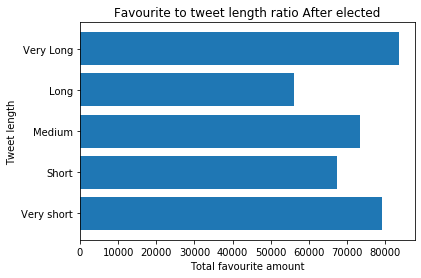

In [295]:
y_len_After = After_elected_len.index
x_len_After = After_elected_len['  favorite_count  ']

plt.barh(y_len_After,x_len_After)
plt.title('Favourite to tweet length ratio After elected')
plt.ylabel('Tweet length')
plt.xlabel('Total favourite amount')
plt.show()


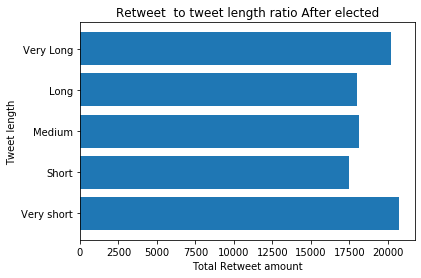

In [296]:
y_len_retweet_After = After_elected_len.index
x_len_retweet_After = After_elected_len['  retweet_count  ']

plt.barh(y_len_retweet_After,x_len_retweet_After)
plt.title('Retweet  to tweet length ratio After elected')
plt.ylabel('Tweet length')
plt.xlabel('Total Retweet amount')
plt.show()

In [297]:
Before_elected_len_Total = Before.groupby(Before['len_bin']).count()
After_elected_len_Total = After.groupby(After['len_bin']).count()

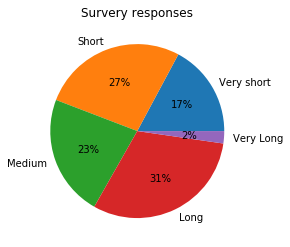

In [318]:
fig, ax = plt.subplots()
ax.pie(Before_elected_len_Total.len, labels = Before_elected_len_Total.index,autopct='%.0f%%')
ax.set_title('Distribution of tweets length before election')
plt.show()

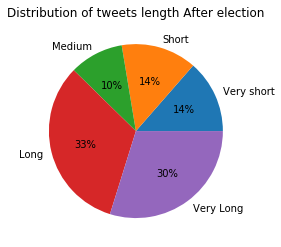

In [319]:
fig, ax = plt.subplots()
ax.pie(After_elected_len_Total.len, labels = After_elected_len_Total.index,autopct='%.0f%%')
ax.set_title('Distribution of tweets length After election')
plt.show()

In [450]:
Iphone = TWEETS_DF.loc[(TWEETS_DF['  source  '] == 'Twitter for iPhone')]
android = TWEETS_DF.loc[(TWEETS_DF['  source  '] == 'Twitter for Android')]

Iphone_group = Iphone.groupby(Iphone['  created_at  '].dt.date).count()
android_group = android.groupby(android['  created_at  '].dt.date).count()

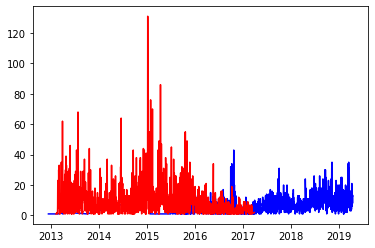

In [461]:
plt.plot(Iphone_group.index,Iphone_group['len'],color='b')
plt.plot(android_group.index,android_group['len'],color='r')

plt.show()

In [431]:
stock_df = pd.read_csv(r'./SPY.csv')
stock_df.rename(columns = {'Date':'  created_at  '}, inplace = True)
stock_df['  created_at  '] = stock_df['  created_at  '].astype('datetime64[ns]')
stock_df

created_at          Open        High         Low       Close  \
0        2017-04-03  235.800003  236.029999  233.910004  235.330002   
1        2017-04-04  235.000000  235.580002  234.559998  235.479996   
2        2017-04-05  236.259995  237.389999  234.539993  234.779999   
3        2017-04-06  234.940002  236.039993  234.429993  235.440002   
4        2017-04-07  235.149994  236.000000  234.639999  235.199997   
...             ...         ...         ...         ...         ...   
1256     2022-03-29  460.019989  462.070007  457.179993  461.549988   
1257     2022-03-30  460.339996  461.200012  456.470001  458.700012   
1258     2022-03-31  457.890015  458.760010  451.160004  451.640015   
1259     2022-04-01  453.309998  453.459991  449.140015  452.920013   
1260     2022-04-01  453.309998  453.458099  449.140015  452.920013   

       Adj Close     Volume  
0     215.649323   85546500  
1     215.786758   56466200  
2     215.145294  108800600  
3     215.750107   69135800  
4     215.530182   74412300  
...          ...        ...  
1256  461.549988   86581500  
1257  458.700012   79666900  
1258  451.640015  121699900  
1259  452.920013   89001500  
1260  452.920013   89048773  

[1261 rows x 7 columns]

In [413]:
# Divide information in 2 DFS one for days the stock market went up and one for when it went down.
Up_df = stock_df.loc[(stock_df['Open'] - stock_df['Close'] > 0)]
down_df = stock_df.loc[(stock_df['Open'] - stock_df['Close'] < 0)]

In [439]:
tweet_by_day_up  = pd.merge(left=Up_df, right=TWEETS_DF ,left_index=True, right_index=True,on =['  created_at  '])
tweet_by_day_down = pd.merge(left=down_df, right=TWEETS_DF, left_index=True, right_index=True,on =['  created_at  '])

In [440]:
tweet_by_day_up_group = tweet_by_day_up.groupby(tweet_by_day_up['  created_at  '].dt.date).mean()
tweet_by_day_down_group = tweet_by_day_down.groupby(tweet_by_day_down['  created_at  '].dt.date).mean()
tweet_by_day_down_group

Open        High         Low       Close   Adj Close  \
  created_at                                                                 
2017-04-04      235.000000  235.580002  234.559998  235.479996  215.786758   
2017-04-06      234.940002  236.039993  234.429993  235.440002  215.750107   
2017-04-07      235.149994  236.000000  234.639999  235.199997  215.530182   
2017-04-11      234.899994  235.179993  233.339996  235.059998  215.401855   
2017-04-17      233.110001  234.570007  232.880005  234.570007  214.952896   
...                    ...         ...         ...         ...         ...   
2022-03-22      445.859985  450.579987  445.859985  449.589996  449.589996   
2022-03-24      445.940002  450.500000  444.760010  450.489990  450.489990   
2022-03-25      451.160004  452.980011  448.429993  452.690002  452.690002   
2022-03-28      452.059998  455.910004  450.059998  455.910004  455.910004   
2022-03-29      460.019989  462.070007  457.179993  461.549988  461.549988   

                  Volume    retweet_count      favorite_count    len  
  created_at                                                          
2017-04-04      56466200            27460.0            103713.0  265  
2017-04-06      69135800            17405.0             79877.0  278  
2017-04-07      74412300            31263.0            105245.0  187  
2017-04-11      88045300            15642.0             56099.0   90  
2017-04-17      68405400             8234.0             31674.0   57  
...                  ...                ...                 ...  ...  
2022-03-22      74650400            16542.0             78517.0  277  
2022-03-24      64736900            15979.0             79668.0  202  
2022-03-25      77101300            17811.0             80977.0  284  
2022-03-28      68529800            18488.0             87083.0  280  
2022-03-29      86581500            32372.0            143510.0  248  

[678 rows x 9 columns]

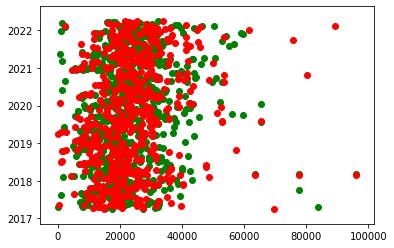

In [449]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(tweet_by_day_down_group['  retweet_count  '], tweet_by_day_down_group.index ,c = 'g', label = 'elbow')
ax1.scatter(tweet_by_day_up_group['  retweet_count  '], tweet_by_day_up_group.index, c = 'r', label = 'shoulder')
plt.show()